In [38]:
import tools_function as fc
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
from scipy.signal import wiener

In [39]:
Img = cv2.imread('lena.jpg')
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
h = Img.shape[0]
w = Img.shape[1]

### 实验要求： **维纳滤波**下，比较信噪比未知、信噪比已知，图像和噪声自相关函数已知，这三种情况下的图像复原结果。

#### 模拟图像退化

In [40]:
"""生成角度60的运动模糊的矩阵，第二参数是模糊的程度，其值越大，模糊程度越高"""
motion_blur = fc.motion_blur(Img,10, 60)
add_noise = fc.add_gaussian_noise(motion_blur, sigma = 25)

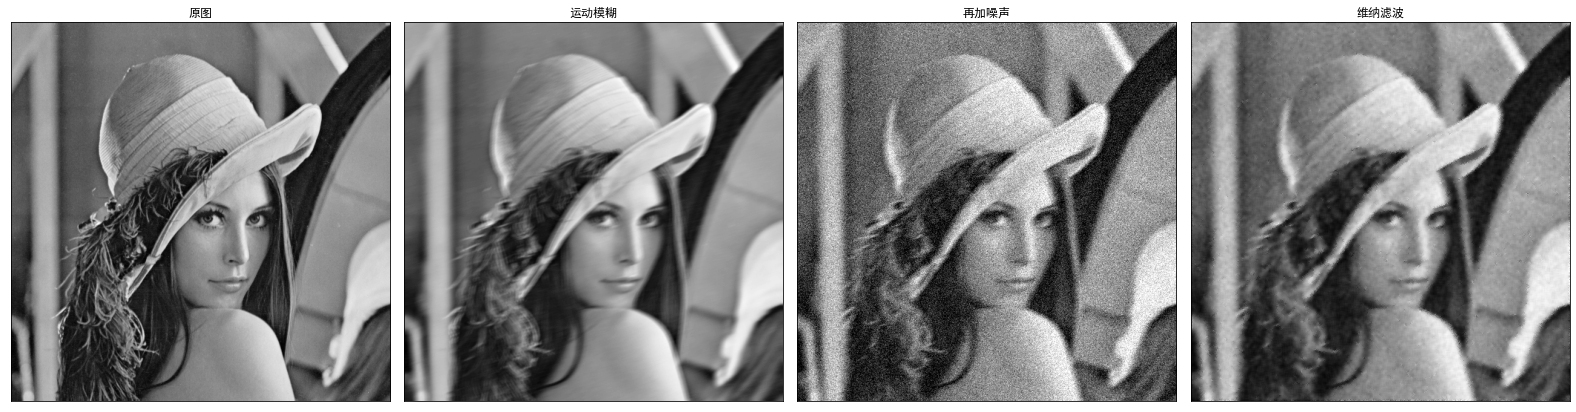

(None, None)

In [41]:
denoise = wiener(add_noise, (5, 5))

#显示
plt.figure(figsize=(22,22))
plt.subplot(141), plt.imshow(Img,'gray'), plt.title('原图'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(motion_blur,'gray'), plt.title('运动模糊'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(add_noise,'gray'), plt.title('再加噪声'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(denoise,'gray'), plt.title('维纳滤波'), plt.xticks([]), plt.yticks([])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.tight_layout(), plt.show()